In [1]:
!pwd

/home/jhe378/works/wkth_votca/votca/csg-tutorials/spce/ibi_lammps


### RDF

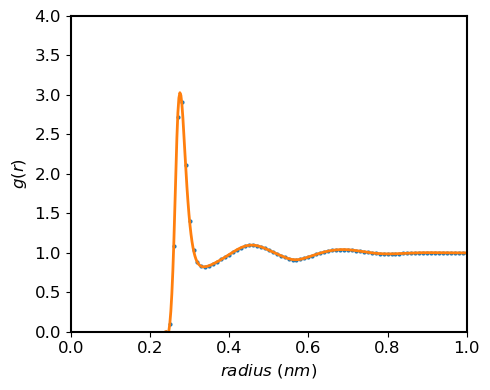

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


# 读取文件
data = pd.read_csv('/home/jhe378/works/wkth_votca/votca/csg-tutorials/spce/ibi_lammps/CG-CG.dist.tgt', sep=' ', names=['r', 'g(r)', 'name'])

# 分离数据点为x和y
x = data['r']
y = data['g(r)']

# 使用插值创建平滑曲线
x_smooth = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)  # k=3表示三次样条插值
y_smooth = spl(x_smooth)



# 绘制原始数据点和平滑曲线，采用指定的格式
plt.figure(figsize=(5, 4))
# plt.plot(x, y, 'o', label='Original Data', linewidth=2, markersize=2)
# plt.plot(x_smooth, y_smooth, '-', label='Smoothed Curve', linewidth=2)
plt.plot(x, y, 'o', linewidth=2, markersize=2)
plt.plot(x_smooth, y_smooth, '-', linewidth=2)

# 添加图例
# plt.legend()

# 设置其它图表属性，这里保持和之前设置一致
plt.xlim([0, 1])
plt.ylim([0, 4])
plt.ylabel('$g(r)$', fontsize=12)
plt.xlabel('$radius\ (nm)$', fontsize=12)
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.box(on=True)
plt.tight_layout()

# 保存并显示图表
# plt.savefig('radial_distribution_function_with_smoothed_curve.png', dpi=300, bbox_inches='tight')
plt.show()


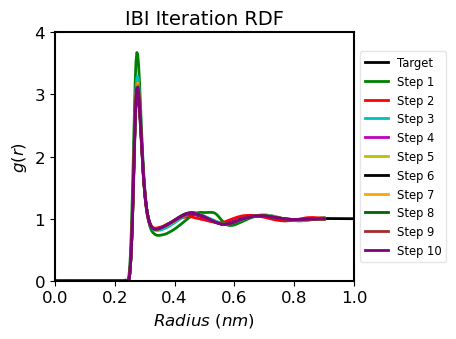

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 函数来读取数据并执行插值
def read_and_interpolate(filepath):
    data = pd.read_csv(filepath, sep=' ', names=['r', 'g(r)', 'name'], comment='#')
    x = data['r']
    y = data['g(r)']
    x_smooth = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=3)  # k=3表示三次样条插值
    y_smooth = spl(x_smooth)
    return x_smooth, y_smooth

# 定义一个较长的颜色列表
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'darkgreen', 'brown', 'purple']

# 绘图设置
plt.figure(figsize=(5, 3.5))

# 先处理原始数据文件
filepath = '/home/jhe378/works/wkth_votca/votca/csg-tutorials/spce/ibi_lammps/CG-CG.dist.tgt'
try:
    x_smooth, y_smooth = read_and_interpolate(filepath)
    plt.plot(x_smooth, y_smooth, '-', linewidth=2, color='black', label='Target')  # 使用黑色表示目标
except FileNotFoundError:
    print(f"File not found: {filepath}")

# 循环处理step_001到step_010的文件
for step in range(1, 11):  # 从step_001到step_010
    step_str = f'{step:03}'  # 确保步骤编号为三位数，如001, 002,..., 010
    filepath = f'/home/jhe378/works/wkth_votca/votca/csg-tutorials/spce/ibi_lammps/step_{step_str}/CG-CG.dist.new'
    
    try:
        x_smooth, y_smooth = read_and_interpolate(filepath)
        # 指定颜色
        color = colors[step % len(colors)]
        plt.plot(x_smooth, y_smooth, '-', linewidth=2, color=color, label=f'Step {step}')
    except FileNotFoundError:
        print(f"File not found: {filepath}")

# 添加标题
plt.title("IBI Iteration RDF", fontsize=14)

# 设置图例位置在图形外的右侧
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', framealpha=0.5)

# 设置其它图表属性
plt.xlim([0, 1])
plt.ylim([0, 4])
plt.ylabel('$g(r)\ $', fontsize=12)
plt.xlabel('$Radius\ (nm)$', fontsize=12)
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.box(on=True)
plt.tight_layout()

# 调整子图布局，为图例留出空间
plt.subplots_adjust(right=0.75)  # 根据图例大小调整

# 显示图表
plt.show()


### Energy

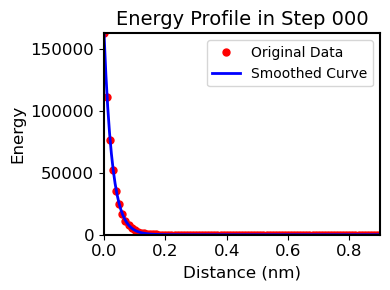

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 定义文件路径
filepath = '/home/jhe378/works/wkth_votca/votca/csg-tutorials/spce/ibi_lammps/step_000/CG-CG.pot.new'

# 读取文件，忽略以#开头的注释行
data = pd.read_csv(filepath, sep=' ', comment='#', names=['r', 'Energy', 'name'])

# 分离数据点为x和y
x = data['r']
y = data['Energy']

# 使用插值创建平滑曲线
x_smooth = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)  # k=3表示三次样条插值
y_smooth = spl(x_smooth)

# 绘图设置
plt.figure(figsize=(4, 3))

# 绘制原始数据点和平滑曲线
plt.plot(x, y, 'o', label='Original Data', markersize=5, color='red')
plt.plot(x_smooth, y_smooth, '-', label='Smoothed Curve', linewidth=2, color='blue')

# 添加图例
plt.legend()

# 设置图表属性
plt.xlim([0, x.max()])
plt.ylim(min(y), max(y))
plt.ylabel('Energy', fontsize=12)
plt.xlabel('Distance (nm)', fontsize=12)
plt.title('Energy Profile in Step 000', fontsize=14)
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.box(on=True)
plt.tight_layout()

# 显示图表
plt.show()


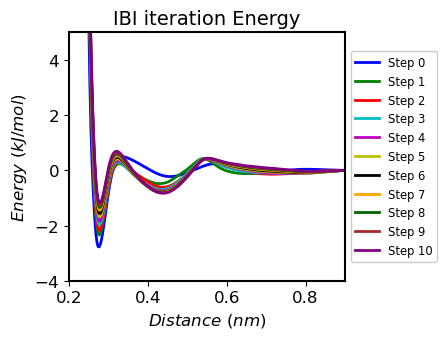

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 函数来读取数据并执行插值
def read_and_interpolate_energy(filepath):
    data = pd.read_csv(filepath, sep=' ', comment='#', names=['r', 'Energy', 'name'])
    x = data['r']
    y = data['Energy']
    x_smooth = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=3)  # k=3表示三次样条插值
    y_smooth = spl(x_smooth)
    return x_smooth, y_smooth

# 定义一个较长的颜色列表
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'darkgreen', 'brown', 'purple']

# 绘图设置
plt.figure(figsize=(5, 3.5))

# 循环处理step_000到step_010的文件
for step in range(0, 11):  # 包括step_000到step_010
    step_str = f'{step:03}'  # 确保步骤编号为三位数，如000, 001,..., 010
    filepath = f'/home/jhe378/works/wkth_votca/votca/csg-tutorials/spce/ibi_lammps/step_{step_str}/CG-CG.pot.new'
    
    try:
        x_smooth, y_smooth = read_and_interpolate_energy(filepath)
        # 指定颜色
        color = colors[step % len(colors)]
        plt.plot(x_smooth, y_smooth, '-', linewidth=2, label=f'Step {step}', color=color)
    except FileNotFoundError:
        print(f"File not found: {filepath}")

# 添加标题
plt.title("IBI iteration Energy", fontsize=14)

# 设置图例位置在图形外的右侧
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', framealpha=1)

# 设置其它图表属性
plt.xlim([0.2, 0.9])
plt.ylim(-4, 5)  # 根据你的数据可能需要调整
plt.ylabel('$Energy\ (kJ/mol)$', fontsize=12)
plt.xlabel('$Distance\ (nm)$', fontsize=12)
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.box(on=True)
plt.tight_layout()

# 调整子图布局，为图例留出空间
plt.subplots_adjust(right=0.7)  # 根据图例大小调整

# 显示图表
plt.show()
